<a href="https://colab.research.google.com/github/Kanika1201/ML-Project-2/blob/main/Part1_All_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

In [8]:
#import librarires
import pandas as pd
import numpy as np

#visualizaiton
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

#pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Time
import time

In [9]:
pip install torchinfo

Note: you may need to restart the kernel to use updated packages.


## Step 1

In [11]:
# Reading dataset
df = pd.read_csv("Datasets/dataset.csv")
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [12]:
#printing info about dataaset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [13]:
# handling mislabeled values
for col in df.columns:
    df[col] = pd.to_numeric(df[col] , errors = 'coerce')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      760 non-null    float64
 1   f2      760 non-null    float64
 2   f3      760 non-null    int64  
 3   f4      760 non-null    float64
 4   f5      760 non-null    float64
 5   f6      760 non-null    float64
 6   f7      760 non-null    float64
 7   target  760 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 53.4 KB


In [14]:
# data feature
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


## Visualisation

### 1. Heatmap

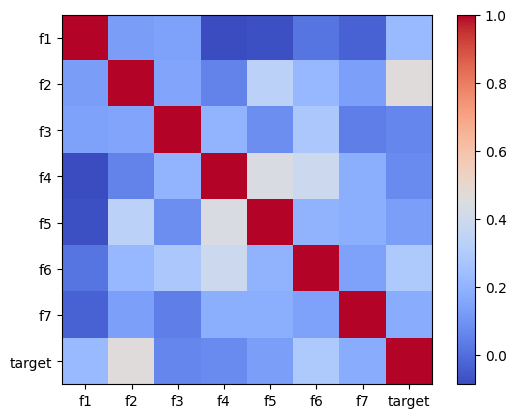

In [15]:
corr = df.corr()
plt.imshow(corr , cmap = 'coolwarm' , interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(df.shape[1]), labels=list(df.columns))
plt.yticks(ticks=np.arange(df.shape[1]), labels=list(df.columns))
plt.show()

#### 2. Box Plot for Outlinears in every feature

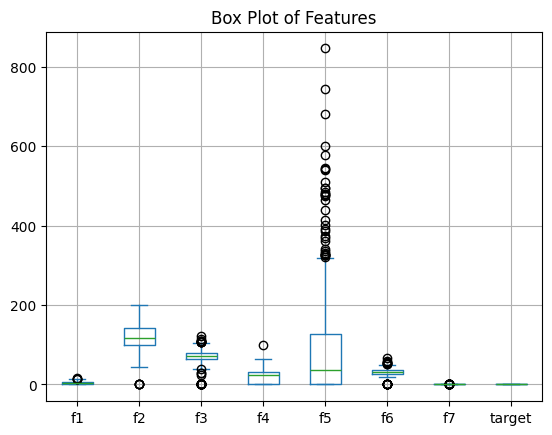

In [16]:
df.plot(kind='box', grid=True)
plt.title('Box Plot of Features')
plt.show()

#### 3. Distribution of Target variable

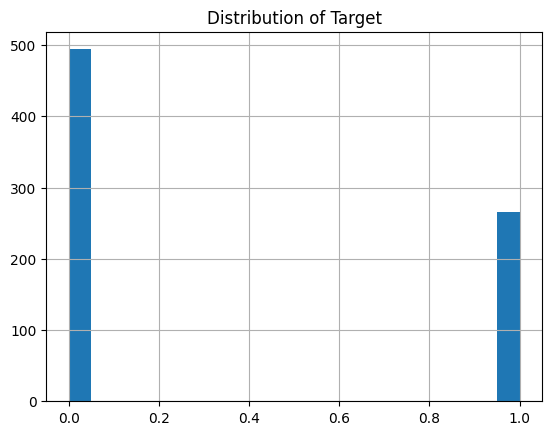

In [17]:
plt.hist(df['target'], bins=20)
plt.grid()
plt.title('Distribution of Target')
plt.show()

### Step 2 - Preprocessing and Splitting Dataset

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
feature_col = ["f1" , "f2" , "f3" , "f4" , "f5" , "f6" , "f7"]

In [20]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_col]) , columns=feature_col)
df_scaled["target"] = df["target"]
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6.0,148.0,72,35.0,0.0,33.6,0.627,1
1,1.0,85.0,66,29.0,0.0,26.6,0.351,0
2,8.0,183.0,64,0.0,0.0,23.3,0.672,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,0
4,0.0,137.0,40,35.0,168.0,43.1,2.288,1


In [21]:
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

In [22]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=16, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=7, shuffle=True)

In [149]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


print("Training Tensor Shape:", X_train_tensor.shape)
print("Validation Tensor Shape:", X_val_tensor.shape)
print("Test Tensor Shape:", X_test_tensor.shape)

Training Tensor Shape: torch.Size([532, 7])
Validation Tensor Shape: torch.Size([114, 7])
Test Tensor Shape: torch.Size([114, 7])


## Step 3: Defining the Neural Network

In [179]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary

# Define the SimpleNN class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(7, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        #self.fc4 = nn.Linear(64, 1)

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        #x = self.dropout(x)
        x = F.relu(self.fc2(x))
        #x = self.dropout(x)
        #x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc3(x))  # Output layer with Sigmoid activation
        return x

# Instantiate the model
model = SimpleNN()

# Display a summary of the model
summary(model, input_size=(1, 7))


Layer (type:depth-idx)                   Output Shape              Param #
SimpleNN                                 [1, 1]                    --
├─Linear: 1-1                            [1, 32]                   256
├─Linear: 1-2                            [1, 16]                   528
├─Linear: 1-3                            [1, 1]                    17
Total params: 801
Trainable params: 801
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## Step 4: Training the Neural Network

In [180]:
# loss function and optimizer
# We have used BCELoss and Adam optimizer

best_model_path = "best_model.pth"  # This will save the file in the current directory

In [181]:
# Training the model
def train(model, training_details,  train_data, val_data,  optimizer, loss_function, epochs=100, batch_size=16):
    train_loss = []
    val_loss_list = []
    val_acc_list = []
    train_acc_list = []

    #data
    X_train_tensor , y_train_tensor = train_data
    X_val_tensor , y_val_tensor = val_data
    
    # Track the best validation accuracy
    best_val_acc = 0.0
    best_model_path = 'best_model.pth'

    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    start_time = time.time()

    for epoch in range(epochs):
        # Training
        model.train()
        epoch_loss = 0.0

        correct_pred = 0
        total_pred = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            pred = torch.round(outputs)
            correct_pred += (pred == labels).sum().item()
            total_pred += labels.size(0)

        # Average loss
        avg_train_loss = epoch_loss / len(train_loader)
        train_loss.append(avg_train_loss)

        # training accuracy
        train_acc = correct_pred / total_pred
        train_acc_list.append(train_acc)

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor).squeeze()
            val_loss = loss_function(val_outputs, y_val_tensor)
            val_loss_list.append(val_loss.item())

            val_pred = torch.round(val_outputs)
            val_acc = accuracy_score(y_val_tensor.numpy(), val_pred.numpy())
            val_acc_list.append(val_acc)

            # Save the model if validation accuracy improves
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                torch.save(model.state_dict(), best_model_path)  # Save best model
                print(f"New best model saved at epoch {epoch+1} with validation accuracy {val_acc:.4f}")


        # training and validation results
        if epoch%10==0:
            print(f'Epoch {epoch + 1}/{epochs}, '
                f'Train Loss: {avg_train_loss:.4f}, '
                f'Validation Loss: {val_loss.item():.4f}, '
                f'Validation Accuracy: {val_acc:.4f}')

    print(f'Training Complete. Time taken: {time.time() - start_time:.2f} seconds.')
    print(f'Best Validation Accuracy: {best_val_acc:.4f}')
    training_details["train_loss"].extend(train_loss)
    training_details["val_loss_list"].extend(val_loss_list)
    training_details["val_acc_list"].extend(val_acc_list)
    training_details["train_acc_list"].extend(train_acc_list)

    return 


In [182]:
model = SimpleNN()
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
training_details = {
    "train_loss" : [],
    "val_loss_list" : [],
    "val_acc_list" : [],
    "train_acc_list" : []
}
train(
    model,
    training_details,
    (X_train_tensor,y_train_tensor),
    (X_val_tensor, y_val_tensor),
    optimizer,
    loss_function,
    epochs=150,
    batch_size=4
    )
train_loss , val_loss_list, val_acc_list , train_acc_list = list(training_details.values())

New best model saved at epoch 1 with validation accuracy 0.4737
Epoch 1/150, Train Loss: 0.6967, Validation Loss: 0.6960, Validation Accuracy: 0.4737
New best model saved at epoch 2 with validation accuracy 0.6140
New best model saved at epoch 4 with validation accuracy 0.6491
New best model saved at epoch 6 with validation accuracy 0.6667
New best model saved at epoch 7 with validation accuracy 0.6842
New best model saved at epoch 8 with validation accuracy 0.6930
New best model saved at epoch 11 with validation accuracy 0.7018
Epoch 11/150, Train Loss: 0.5447, Validation Loss: 0.5749, Validation Accuracy: 0.7018
New best model saved at epoch 12 with validation accuracy 0.7105
New best model saved at epoch 15 with validation accuracy 0.7281
Epoch 21/150, Train Loss: 0.4930, Validation Loss: 0.5265, Validation Accuracy: 0.7193
New best model saved at epoch 22 with validation accuracy 0.7368
Epoch 31/150, Train Loss: 0.4773, Validation Loss: 0.5091, Validation Accuracy: 0.7193
Epoch 41/

In [183]:
#model.load_state_dict(torch.load('best_model.pth'))

In [174]:
# Test the model
def eval(model, X_test_tensor, y_test_tensor):
    model.eval()  # evaluation mode
    test_loss_list=[]

    with torch.no_grad():
        test_outputs = model(X_test_tensor).squeeze()
        pred = torch.round(test_outputs)
        test_loss = loss_function(test_outputs, y_test_tensor)
        test_loss_list.append(test_loss.item())

        acc = accuracy_score(y_test_tensor.numpy(), pred.numpy())
        prec, recall, f1, _ = precision_recall_fscore_support(y_test_tensor.numpy(), pred.numpy(), average='binary')

        y_true = y_test_tensor.numpy()
        y_pred = pred.numpy()

        print(f'Test Accuracy: {acc:.3f}')
        print(f'Test Precision: {prec:.3f}')
        print(f'Test Recall: {recall:.3f}')
        print(f'Test F1 Score: {f1:.3f}')

        return acc, prec, recall, f1, test_loss_list, y_true, y_pred, test_outputs  # Return metrics



In [184]:

accuracy, precision, recall, f1, test_loss, y_true, y_pred, test_outputs = eval(model, X_test_tensor, y_test_tensor)

Test Accuracy: 0.781
Test Precision: 0.700
Test Recall: 0.568
Test F1 Score: 0.627


#### Visualization

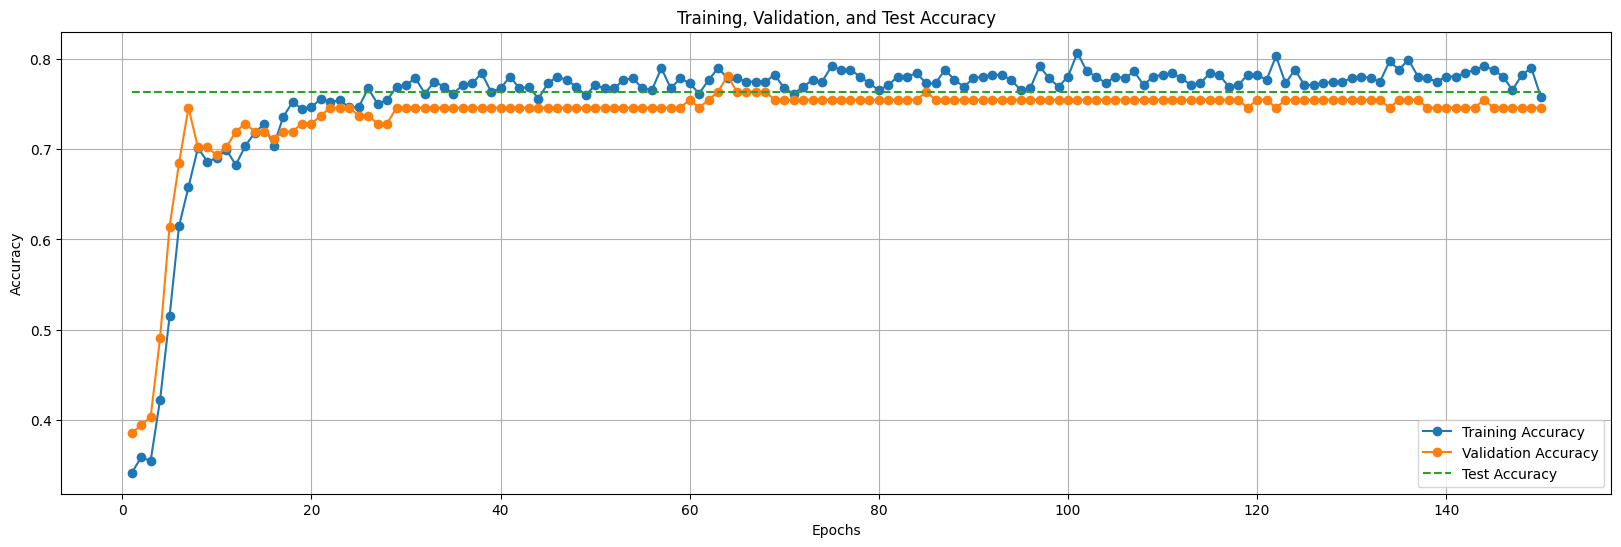

In [176]:
plt.figure(figsize=(20, 6))
test_acc_list = [accuracy] * len(train_acc_list)
epochs = range(1, len(train_acc_list) + 1)

plt.plot(epochs, train_acc_list, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc_list, label='Validation Accuracy', marker='o')
plt.plot(epochs, test_acc_list, label='Test Accuracy', linestyle='--')

plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()
plt.xticks()
plt.show()

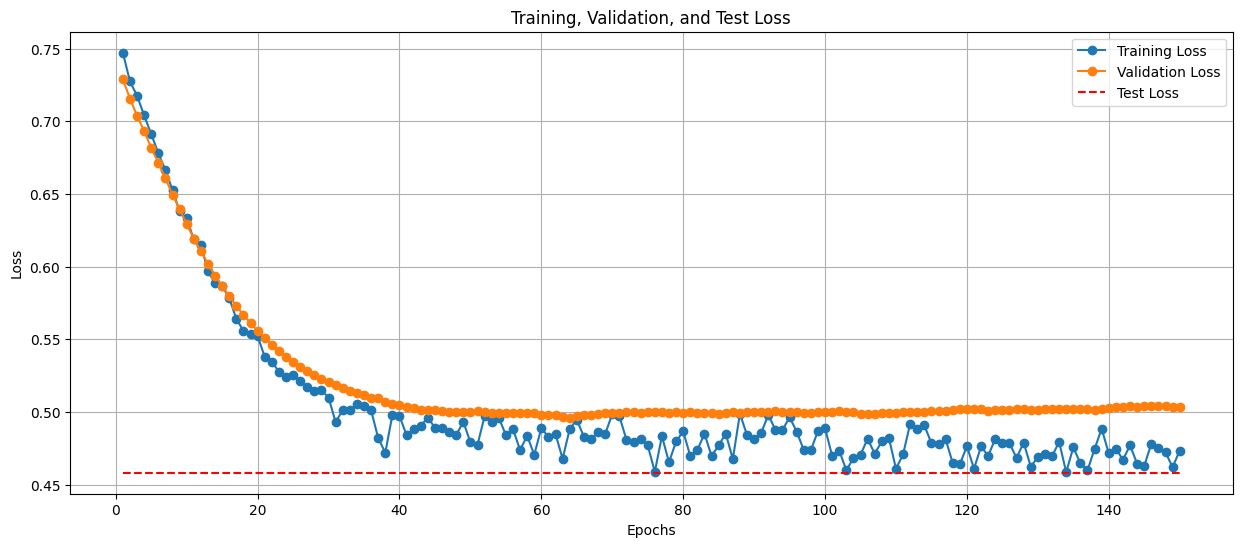

In [177]:
plt.figure(figsize=(15, 6))
test_loss_list = [test_loss] * len(train_acc_list)

plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss_list, label='Validation Loss', marker='o')
plt.plot(epochs, test_loss_list, label='Test Loss', color='red', linestyle='--')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid()
plt.xticks()
plt.show()

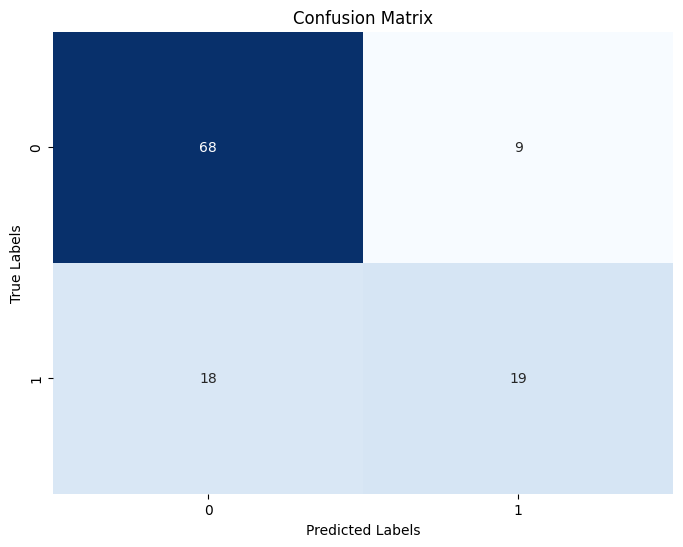

In [178]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

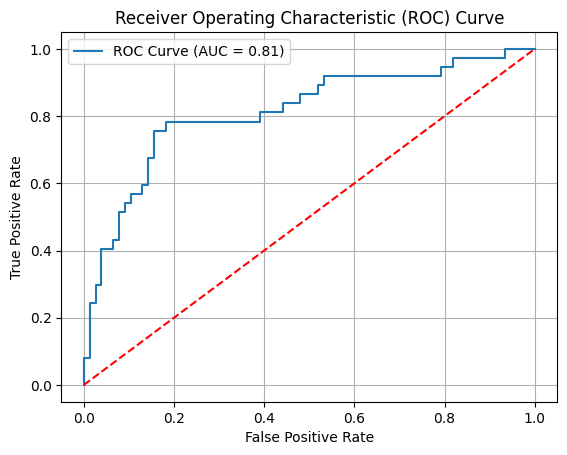

In [ ]:
fpr, tpr, _ = roc_curve(y_true, test_outputs.numpy())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()